<a href="https://colab.research.google.com/github/femas86/SDV_googleColab/blob/main/Custom_validation_and_train_sets_with_multiple_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
77/77 [==============================] - 1s 4ms/step - loss: 48471.8047 - root_mean_squared_error: 220.1631 - val_loss: 40889.0195 - val_root_mean_squared_error: 202.2103
Epoch 2/10
77/77 [==============================] - 0s 2ms/step - loss: 33866.1523 - root_mean_squared_error: 184.0276 - val_loss: 27929.2656 - val_root_mean_squared_error: 167.1205
Epoch 3/10
77/77 [==============================] - 0s 2ms/step - loss: 22679.8047 - root_mean_squared_error: 150.5982 - val_loss: 18195.6328 - val_root_mean_squared_error: 134.8912
Epoch 4/10
77/77 [==============================] - 0s 2ms/step - loss: 14541.9941 - root_mean_squared_error: 120.5902 - val_loss: 11576.6172 - val_root_mean_squared_error: 107.5947
Epoch 5/10
77/77 [==============================] - 1s 14ms/step - loss: 9464.7188 - root_mean_squared_error: 97.2868 - val_loss: 8018.6396 - val_root_mean_squared_error: 89.5469
Epoch 6/10
77/77 [==============================] - 0s 5ms/step - loss: 7294.4600 - root_mean

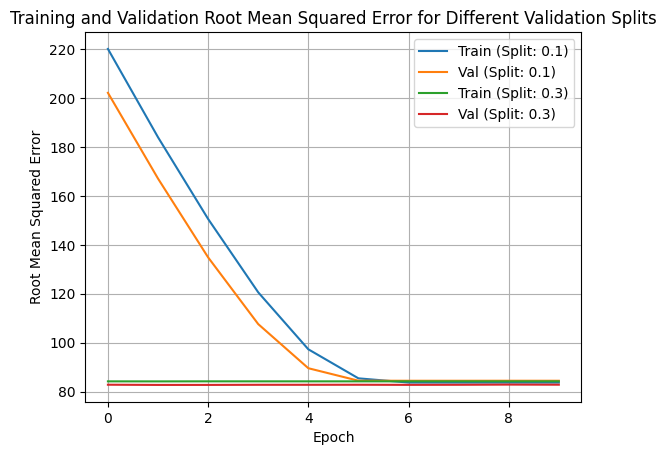

[[7011.6552734375, 83.73562622070312], [7011.197265625, 83.73289489746094]]


In [ ]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Replace with your actual model definition
def create_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

# Function to train and get loss history
def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=None):
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)
      # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    return epochs, history.history['root_mean_squared_error'], history.history['val_root_mean_squared_error']  # Return both train and val MSE


# Validation split ratios to experiment with
validation_splits = [0.1, 0.3]

# Create the model once outside the loop
model = create_model(0.1)

# Store loss history for each split
train_losses, val_losses, results = [], [], []

my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
batch_size = 200

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Train and get loss history with different validation splits
for validation_split in validation_splits:
    epochs, train_loss, val_loss = train_model(model, shuffled_train_df, my_feature, my_label, 10,
                                                batch_size, validation_split)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    results.append(model.evaluate(test_df[my_feature], test_df[my_label], batch_size=batch_size))
# Plot the results
#epochs = range(1, len(train_losses[0]) + 1)  # Assuming all histories have same number of epochs

plt.figure()
for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
    plt.plot(epochs, train_loss, label=f"Train (Split: {validation_splits[i]})")
    plt.plot(epochs, val_loss, label=f"Val (Split: {validation_splits[i]})")

plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")
plt.title("Training and Validation Root Mean Squared Error for Different Validation Splits")
plt.legend()
plt.grid(True)
plt.show()
print(results)